# Code to pre process images of droplets

In [1]:
'''
pip install openvc-python
pip install cvlib
pip install tensorflow
'''

import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import pandas as pd
from cvlib.object_detection import draw_bbox
from ipywidgets import *

Using TensorFlow backend.


Code to see an image:

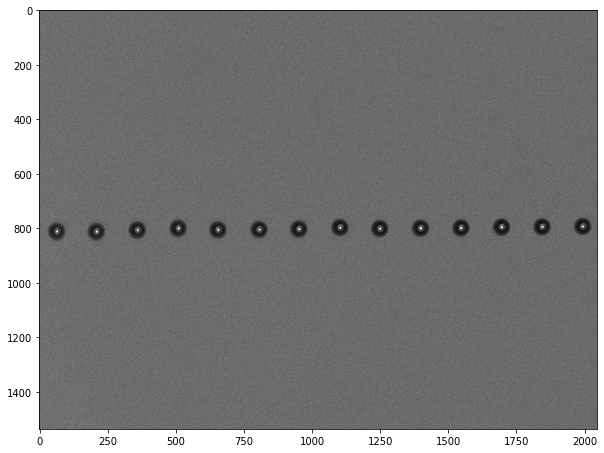

In [2]:
directory = 'Test_Images/'  # Directory where image is
file_name = '1.5mm_53.6ul_254.5kHz'  # file name
file_type = 'png'
img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))

# Showing the loaded picture
plt.figure(figsize=(10, 10))

# order of RGB needs to be changed for plt imshow to work
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Code to read in image in Grayscale, try to find circles and then show where the circles are:

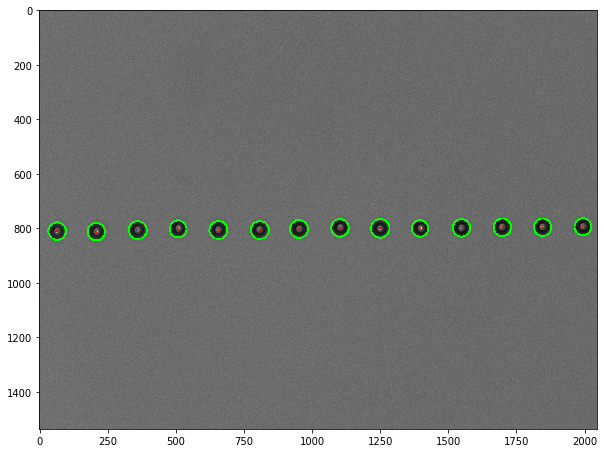

In [3]:
directory = 'Test_Images/'  # Directory where image is
file_name = '1.5mm_53.6ul_254.5kHz'  # file name
file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))


in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

# dp Inverse ratio of the accumulator resolution to the image resolution.
dp = 1
# minDist Minimum distance between the centers of the detected circles.
minDist = 40
# param1
param1 = 80
# param2
param2 = 20
# minRadius
minRadius = 5
# maxRadius
maxRadius = minRadius+45
circles = cv2.HoughCircles(in_img_gray,
                           cv2.HOUGH_GRADIENT,
                           dp,
                           minDist,
                           param1=param1,
                           param2=param2,
                           minRadius=minRadius,
                           maxRadius=maxRadius)
# circles is a matrix with elements x_pos,y_pos,radius in pixels
circles = np.uint16(np.around(circles))


output = in_img.copy()

for i in circles[0, :]:
    #	draw	the	outer	circle
    cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 6)
    #	draw	the	center	of	the	circle
    cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [4]:
def param_test(in_img, param1=80, param2=20, minRadius=5, maxRadius=50):

    in_img_gray = cv2.cvtColor(
        in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

    circles = cv2.HoughCircles(in_img_gray,
                               cv2.HOUGH_GRADIENT,
                               1,
                               120,
                               param1=param1,
                               param2=param2,
                               minRadius=minRadius,
                               maxRadius=maxRadius)
    circles = np.uint16(np.around(circles))

    output = in_img.copy()
    for i in circles[0, :]:
        #	draw	the	outer	circle
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 6)
        #	draw	the	center	of	the	circle
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(16, 16))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

    return circles


directory = 'Test_Images/'  # Directory where image is
file_name = '1.5mm_53.6ul_254.5kHz'  # file name # Straight train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182515-19' #Further out, not a nice train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182514-13' # 3 sharp, some not in focus
# file_name = '39.0mm_53.6ul_254.5kHz-02122020190603-1186'  # 1 sharp
# file_name = '466.5kHz_4bar_50mm-10092019144205-1'  # one speckled
# file_name = '466.5kHz_4bar_50mm-10092019144210-20'  # one cracked, one round
# file_name = '466.5kHz_4bar_50mm-10092019144229-79'  # one with rugged cirmumference (escaping small droplet)
#file_name = '466.5kHz_4bar_50mm-10092019144205-1'

file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))


in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

interactive_plot = interactive(param_test, in_img=fixed(in_img), param1=(0, 100), param2=(
    0, 100), minRadius=(0, 100), maxRadius=(0, 300))
interactive_plot

interactive(children=(IntSlider(value=80, description='param1'), IntSlider(value=20, description='param2'), In…

In [5]:
# trick to get the result out from the itneractive plot:
circles = interactive_plot.result

[[[ 658  806   33]
  [ 362  806   33]
  [1252  800   34]
  [1848  796   32]
  [ 810  806   33]
  [1398  800   30]
  [  66  810   32]
  [ 210  812   32]
  [1550  798   32]
  [ 954  802   33]
  [1700  796   32]
  [1996  794   31]
  [ 510  802   31]
  [1104  798   32]]]
[806 806 800 796 806 800 810 812 798 802 796 794 802 798]


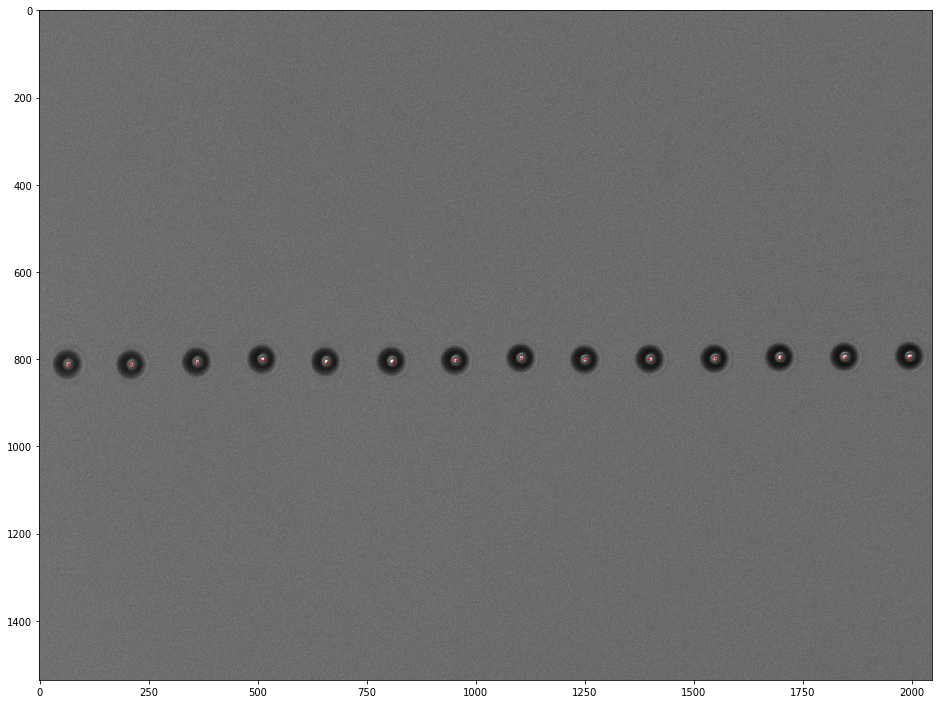

In [6]:
print(circles)
print(circles[0, :, 1])
x = circles[0, :, 0]
y = circles[0, :, 1]
plt.figure(figsize=(16, 16))
plt.imshow(cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB))
plt.scatter(x, y, 2, c='red')  # test to see where te centers are

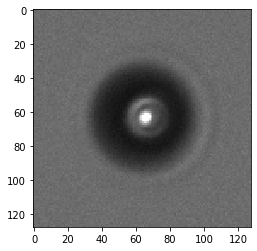

In [7]:
x_positions = circles[0, :, 0]
y_positions = circles[0, :, 1]
radii = circles[0, :, 2]

cut_from = in_img.copy()

for circle_index, value in enumerate(x_positions):
    x_pos = x_positions[circle_index]
    y_pos = y_positions[circle_index]
    radius = radii[circle_index]
    if circle_index > -1:
        # image_i=cut_from[x_pos:radius,y_pos:radius]
        image_i = cut_from[y_pos-radius*2:y_pos +
                           radius*2, x_pos-radius*2:x_pos+radius*2]
        plt.imshow(image_i)
        cv2.imwrite('{0}/Cuts/{1}_x_{2}y_{3}r_{4}_cut{5}.png'.format(
            directory, file_name, x_pos, y_pos, radius, circle_index), image_i)
    else:
        break
plt.imshow(image_i)

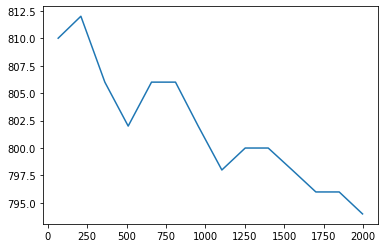

In [8]:
# sorting, also reducing dimensions to 2. This is to get the distances in order.
circles_sorted = circles[0][np.argsort(circles[0][:, 0], axis=0)].astype(float)
x = np.array(circles_sorted[:, 0])
y = np.array(circles_sorted[:, 1])


plt.plot(x, y)


dist = [np.sqrt(
    np.power(x[i+1]-x[i], 2) +
    np.power(y[i+1]-y[i], 2))
    for i in range(len(x)-1)]  # This gives very unlrealistic results on the disatnce between droplets

[144.01388821915754, 152.11837495845134, 148.05404418657398, 148.05404418657398, 152.0, 144.05554484295286, 150.05332385522155, 148.0135128966271, 146.0, 152.0131573252789, 150.0133327407934, 148.0, 148.0135128966271]


(array([2., 0., 1., 0., 5., 0., 0., 2., 0., 3.]),
 array([144.01388822, 144.82433689, 145.63478557, 146.44523424,
        147.25568291, 148.06613159, 148.87658026, 149.68702894,
        150.49747761, 151.30792628, 152.11837496]),
 <a list of 10 Patch objects>)

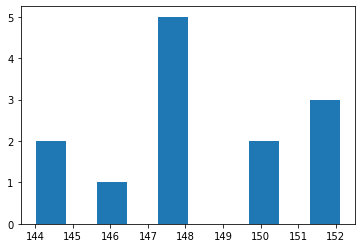

In [9]:
print(dist)
np.average(dist)
plt.hist(dist)

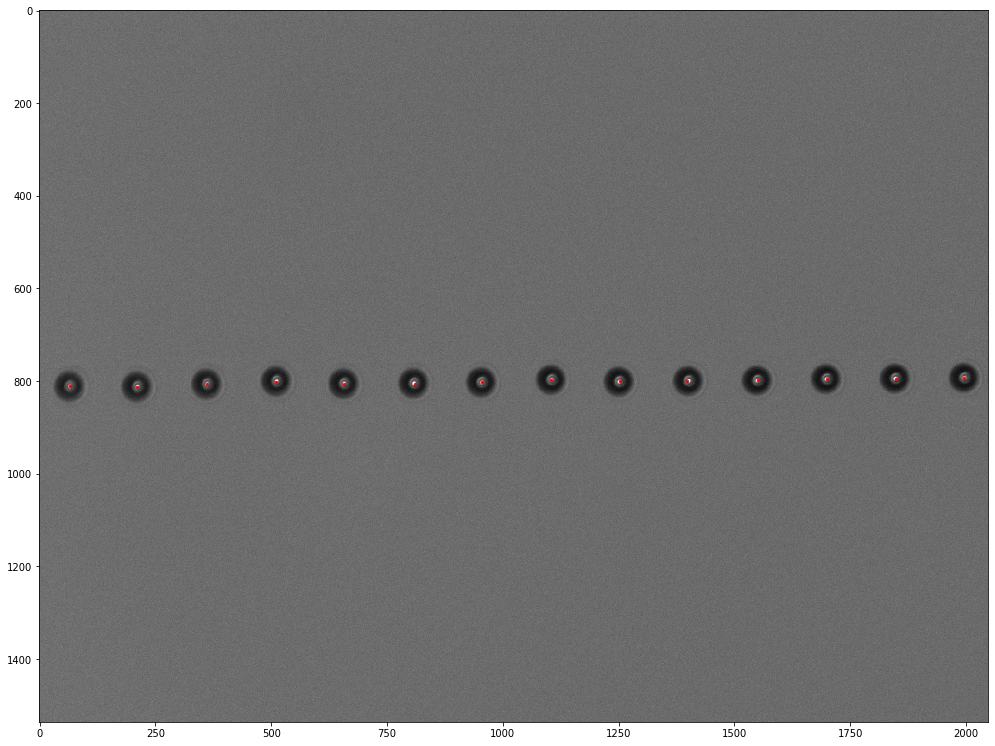

In [10]:
plt.figure(figsize=(17, 17))
plt.imshow(in_img)
plt.scatter(x, y, c='red', s=5)  # test to see where te centers are

interactive(children=(IntSlider(value=99, description='thresh', max=255, min=1), IntSlider(value=255, descript…

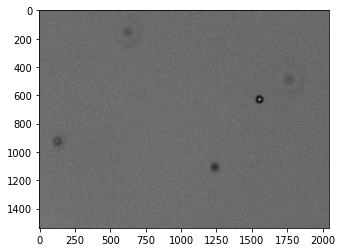

In [11]:
def param_test(in_img, thresh=99, maxval=255):

    in_img_gray = cv2.cvtColor(
        in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

    # ,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
    ret, thresh_img = cv2.threshold(
        in_img_gray, thresh, maxval, cv2.THRESH_BINARY_INV)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB), cmap='gray_r')
    return thresh_img


directory = 'Test_Images/'  # Directory where image is
# file_name = '1.5mm_53.6ul_254.5kHz'  # file name # Straight train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182515-19' #Further out, not a nice train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182514-13' # 3 sharp, some not in focus
file_name = '39.0mm_53.6ul_254.5kHz-02122020190603-1186'  # 1 sharp


file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))

plt.imshow(cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB), cmap='gray_r')


in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

interactive_plot = interactive(param_test, in_img=fixed(in_img.copy()), thresh=(1, 255), maxval=(
    0, 255),)
interactive_plot

In [12]:
thresh = interactive_plot.result

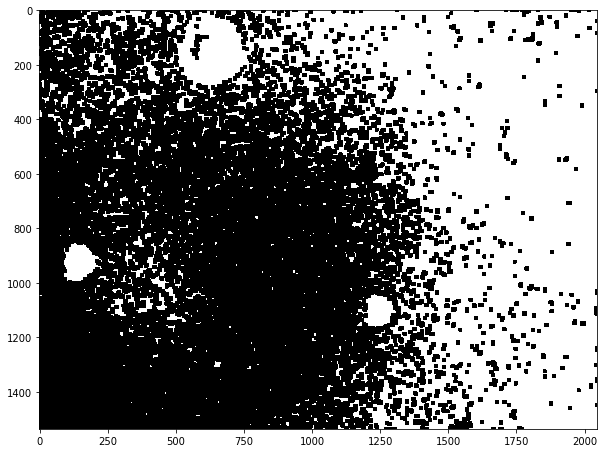

In [13]:
# Noise removal using Morphological
# closing operation
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
                           kernel, iterations=5)

# Background area using Dialation
bg = cv2.dilate(closing, kernel, iterations=5)

# Finding foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0)
plt.figure(figsize=(10, 10))
plt.imshow(fg, cmap='gray')

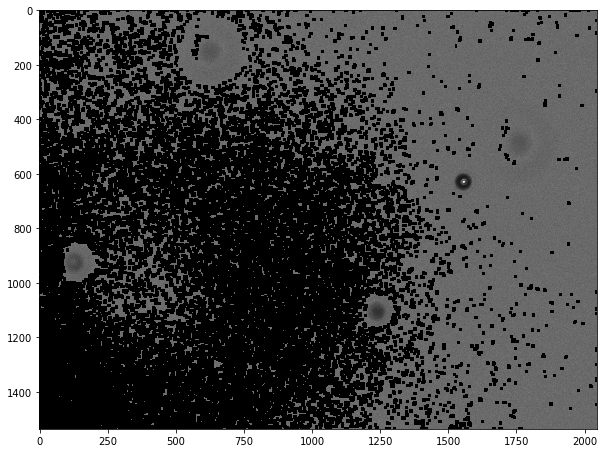

In [14]:
def apply_mask(frame, mask):
    """Apply binary mask to frame, return masked image.
    """
    return cv2.bitwise_and(frame, frame, mask=mask)


masked = apply_mask(in_img_gray, closing)

plt.figure(figsize=(10, 10))
plt.imshow(masked, cmap='gray')


# NOT SO GREAT RESULTS

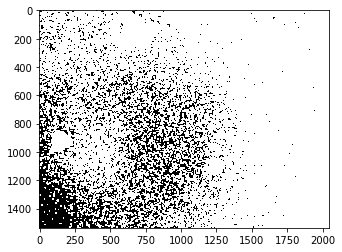

In [15]:
plt.imshow(bg, cmap='gray')

In [16]:
ret

2.4851559448242186

In [17]:
%matplotlib widget

In [18]:
def param_test(in_img, ksize,sigmaX):

    in_img_gray = cv2.cvtColor(
        in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion
    fig=plt.figure(3)

    output = cv2.GaussianBlur(in_img_gray,(ksize,sigmaX),cv2.BORDER_DEFAULT)
    ax=fig.gca()
    ax.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

    return output


directory = 'Test_Images/'  # Directory where image is
#file_name = '1.5mm_53.6ul_254.5kHz'  # file name # Straight train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182515-19' #Further out, not a nice train
file_name = '26.5mm_53.6ul_254.5kHz-02122020182514-13' # 3 sharp, some not in focus
# file_name = '39.0mm_53.6ul_254.5kHz-02122020190603-1186'  # 1 sharp
# file_name = '466.5kHz_4bar_50mm-10092019144205-1'  # one speckled
# file_name = '466.5kHz_4bar_50mm-10092019144210-20'  # one cracked, one round
# file_name = '466.5kHz_4bar_50mm-10092019144229-79'  # one with rugged cirmumference (escaping small droplet)
#file_name = '466.5kHz_4bar_50mm-10092019144205-1'

file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))
in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion


interactive_plot = interactive(param_test, in_img=fixed(in_img), ksize=(1,401,2),sigmaX=(1,401,2))
interactive_plot


interactive(children=(IntSlider(value=201, description='ksize', max=401, min=1, step=2), IntSlider(value=201, …

In [19]:
blurred=interactive_plot.result

In [20]:
plt.figure(5)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
calculation=np.absolute(np.gradient(blurred))[0]
plt.imshow(np.equal(calculation,np.zeros_like(calculation)),cmap='RdBu')
plt.colorbar()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [25]:
np.equal(calculation,np.zeros_like(calculation))

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])

In [23]:
np.zeros_like(calculation)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
plt.figure()
plt.imshow(np.greater(calculation,np.full_like(calculation,0.5)),cmap='gray')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …